<a href="https://colab.research.google.com/github/anurag19997/Sentdex-Practice/blob/master/TPU_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [46]:
tf.debugging.set_log_device_placement(True)

In [4]:
import tensorflow_datasets as tfds
dataset, info = tfds.load(name='fashion_mnist', as_supervised=True, with_info=True, try_gcs=True, split=['train', 'test'], batch_size=-1)

Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelInterleaveDatasetV4 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssertCardinalityDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummyMemoryCache in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op CacheDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PaddedBatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetToSingleElement in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorSliceD

In [28]:
info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [17]:
train, test = tfds.as_numpy(dataset[0]), tfds.as_numpy(dataset[1])

tfds.show_examples(dataset, info)

In [23]:
print(train[0].shape)
print(train[1].shape)

(60000, 28, 28, 1)
(60000,)


In [25]:
x_train, y_train = train[0]/255., tf.one_hot(train[1], 10)
x_test, y_test = test[0]/255., tf.one_hot(test[1], 10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

Executing op OneHot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OneHot in device /job:localhost/replica:0/task:0/device:CPU:0
(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)


In [26]:
x_val, y_val = x_test[5000:], y_test[5000:]
x_test, y_test = x_test[:5000], y_test[:5000]
print(y_test.shape)
print(x_test.shape)
print(x_val.shape)

Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
(5000, 10)
(5000, 28, 28, 1)
(5000, 28, 28, 1)


In [31]:
def create_model():
  return tf.keras.Sequential([tf.keras.layers.Conv2D(64, 5, padding='same', activation='relu', input_shape=(28,28,1)),
                              tf.keras.layers.MaxPooling2D(),
                              tf.keras.layers.Dropout(0.25),

                              tf.keras.layers.Conv2D(128, 5, padding='same', activation='relu'),
                              tf.keras.layers.MaxPooling2D(),
                              tf.keras.layers.Dropout(0.25),

                              tf.keras.layers.Conv2D(256, 5, padding='same', activation='relu'),
                              tf.keras.layers.MaxPooling2D(),
                              tf.keras.layers.Dropout(0.25),

                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(512, activation='relu'),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Dense(10, activation='softmax')])

In [39]:
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)
# strategy = tf.distribute.experimental.TPUStrategy(resolver)

with strategy.scope():
  model = create_model()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
  
  history = model.fit(x_train.astype(np.float32),
                      np.float32(y_train),
                      validation_data=(x_val.astype(np.float32), np.float32(y_val)),
                      steps_per_epoch=234,
                      epochs=25,
                      validation_freq=1)

Streaming output truncated to the last 5000 lines.
Executing op Identity on task /job:worker/replica:0/task:0/device:TPU:7
Executing op AssignVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op AssignVariableOp on task /job:worker/replica:0/task:0/device:TPU:1
Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:1
Executing op AssignVariableOp on task /job:worker/replica:0/task:0/device:TPU:2
Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:2
Executing op AssignVariableOp on task /job:worker/replica:0/task:0/device:TPU:3
Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:3
Executing op AssignVariableOp on task /job:worker/replica:0/task:0/device:TPU:4
Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:4
Executing op AssignVariableOp on task /job:worker/replica:0/task:0/device:TPU:5
Executi

In [41]:
model.save('/tmp/fashion_mnist.hdf5')

Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op Identity on task /job

Text(0, 0.5, 'accuracy')

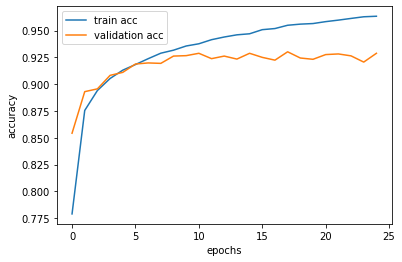

In [57]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [58]:
model.evaluate(x_test, y_test)

Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op RangeDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op RepeatDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op MapDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op TensorDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op RepeatDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ZipDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ComputeBatchSize on task /job:worker/replica:0/task:0/device:CPU:0
Ex

[0.23093414306640625, 0.9267999529838562]

In [59]:
y_pred = model.predict(x_test)

Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op RangeDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op RepeatDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op MapDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op TensorDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op RepeatDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ZipDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ComputeBatchSize on task /job:worker/replica:0/task:0/device:CPU:0
Ex

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test.numpy().argmax(axis=1), y_pred.argmax(axis=1), target_names=info.features['label'].names))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.87       511
     Trouser       0.99      0.99      0.99       487
    Pullover       0.91      0.85      0.88       522
       Dress       0.94      0.95      0.95       490
        Coat       0.82      0.92      0.87       482
      Sandal       0.99      0.99      0.99       506
       Shirt       0.80      0.73      0.76       481
     Sneaker       0.97      0.97      0.97       516
         Bag       0.98      0.99      0.99       504
  Ankle boot       0.98      0.98      0.98       501

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000

